In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [72]:
k = 230
c = 897
den = 2700
alfa = k/(c*den)

# Discretização da malha em x [cm]
dx = 0.01
dy = 0.01
# Discretização no tempo [s]
dt = dx**2 / (4*alfa)

# Comprimento da barra [cm]
Lx = 0.4
Ly = 0.4

# Número de passos []
nt = 5000
print(dt)

0.26325000000000004


In [73]:
tt = dt*nt

# Número de nós []
nx = int(Lx/dx)+1
ny = int(Ly/dy)+1

In [74]:
T = np.zeros(shape=(ny,nx,nt))

In [75]:
#%% Condição de contorno
T[ny-1, : , : ] = 0
T[0,:,:] = 100
T[:,0,:] = 75
T[:,nx-1,:] = 50

In [76]:
print(T[:,:,0])

[[ 75. 100. 100. ... 100. 100.  50.]
 [ 75.   0.   0. ...   0.   0.  50.]
 [ 75.   0.   0. ...   0.   0.  50.]
 ...
 [ 75.   0.   0. ...   0.   0.  50.]
 [ 75.   0.   0. ...   0.   0.  50.]
 [ 75.   0.   0. ...   0.   0.  50.]]


In [77]:
#%% Tolerancia []
tol = 1e-8

#%% Cálculos no tempo
for p in range(0,nt-1):
    for n in range(1,nx-1):
        for m in range(1,ny-1):
    
            T[m,n,p+1] = T[m,n,p] + (alfa*dt/dx**2) * (T[m,n+1,p] + T[m,n-1,p] + T[m+1,n,p] + T[m-1,n,p] - 4 *T[m,n,p])
               
    erro = np.amax(abs((T[1:nx-1,1:ny-1,p]-T[1:nx-1,1:ny-1,p-1])/T[1:nx-1,1:ny-1,p]))
    if tol>=erro:
        
        print('Convergiu!',p)
        break

C:\Users\Nicolas\AppData\Local\Temp/ipykernel_11468/163026455.py:11: RuntimeWarning: invalid value encountered in true_divide
  erro = np.amax(abs((T[1:nx-1,1:ny-1,p]-T[1:nx-1,1:ny-1,p-1])/T[1:nx-1,1:ny-1,p]))


Convergiu! 4332


[[ 75.         100.         100.         ... 100.         100.
   50.        ]
 [ 75.          87.41444633  92.27036522 ...  84.78016965  74.94866745
   50.        ]
 [ 75.          82.3874201   87.15779011 ...  74.79467268  65.01450015
   50.        ]
 ...
 [ 75.          52.42663782  37.70532039 ...  25.34220296  35.05371787
   50.        ]
 [ 75.          37.55133081  22.77868543 ...  15.28848986  25.08555193
   50.        ]
 [ 75.           0.           0.         ...   0.           0.
   50.        ]]
1316.2500000000002


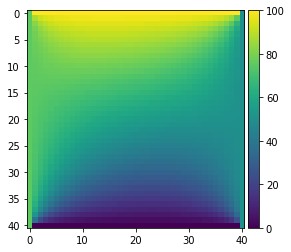

In [78]:
#%% Gráfico para a temperatura
ax = plt.subplot(111)
im = ax.imshow(T[:,:,p])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
print(T[:,:,p])
print(tt)

In [82]:
print(T[int(ny/2),int(nx/2),p])

56.24985844565891
